In [1]:
import quickdraw

2022-06-13 11:50:40.037592: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-13 11:50:40.037614: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
?quickdraw.load_data

In [3]:
(x_train, y_train), (x_test, y_test) = quickdraw.load_data()

In [4]:
x_train.shape, x_train.dtype

((60000, 28, 28), dtype('uint8'))

In [5]:
y_train.shape, y_train.dtype

((60000,), dtype('uint8'))

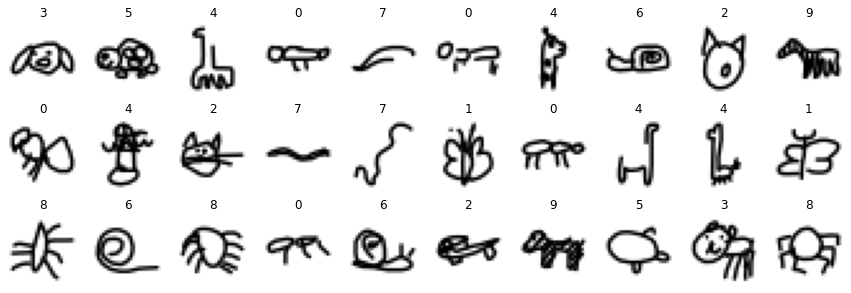

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
for img in range(30):
    plt.subplot(3, 10, img+1)
    plt.imshow(x_train[img], cmap=plt.cm.binary)
    plt.axis(False)
    plt.title(y_train[img])
plt.show()

In [7]:
x_train = x_train/ 255.0
x_test = x_test/ 255.0

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
y_test.shape, y_test.dtype

((10000,), dtype('uint8'))

In [10]:
y_test[:10]

array([8, 1, 9, 2, 6, 2, 2, 9, 4, 2], dtype=uint8)

In [11]:
from tensorflow import keras
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [12]:
y_test[:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [13]:
# # Deep learning 

# # create model
# neural = keras.models.Sequential()

# neural.add(keras.layers.InputLayer(input_shape=(28,28), name='Input'))
# neural.add(keras.layers.Flatten())
# neural.add(keras.layers.Dense(units=512, activation='tanh', name='Hidden_1'))
# neural.add(keras.layers.Dropout(0.3))
# neural.add(keras.layers.Dense(units=128, activation='tanh', name='Hidden_2'))
# neural.add(keras.layers.Dropout(0.2))
# neural.add(keras.layers.Dense(units=32, activation='tanh', name='Hidden_3'))
# neural.add(keras.layers.Dense(units=10, activation='softmax', name='Output'))

# neural.summary()

In [14]:
# Deep learning 

# create model
neural = keras.models.Sequential()

neural.add(keras.layers.InputLayer(input_shape=(28,28), name='Input'))
neural.add(keras.layers.Flatten())
neural.add(keras.layers.Dense(units=512, activation='tanh', name='Hidden_1', 
                              kernel_regularizer=keras.regularizers.l1(1e-4)))
neural.add(keras.layers.Dense(units=128, activation='tanh', name='Hidden_2',
                             kernel_regularizer=keras.regularizers.l1(1e-4)))
neural.add(keras.layers.Dense(units=32, activation='tanh', name='Hidden_3'))
neural.add(keras.layers.Dense(units=10, activation='softmax', name='Output'))

neural.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 Hidden_1 (Dense)            (None, 512)               401920    
                                                                 
 Hidden_2 (Dense)            (None, 128)               65664     
                                                                 
 Hidden_3 (Dense)            (None, 32)                4128      
                                                                 
 Output (Dense)              (None, 10)                330       
                                                                 
Total params: 472,042
Trainable params: 472,042
Non-trainable params: 0
_________________________________________________________________


2022-06-13 11:50:51.881858: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-13 11:50:51.881879: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-13 11:50:51.881894: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (nuc417.bin.bioinf.nl): /proc/driver/nvidia/version does not exist
2022-06-13 11:50:51.882061: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
neural.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.RMSprop(),
    metrics=keras.metrics.CategoricalAccuracy()
)
history = neural.fit(
    x=x_train,
    y=y_train,
    epochs=30,
    batch_size=100,
    verbose=1,
    validation_data=(x_test, y_test)
)

Epoch 1/30
600/600 [==============================] - 4s 6ms/step - loss: 2.1727 - categorical_accuracy: 0.5533 - val_loss: 1.6719 - val_categorical_accuracy: 0.6245
Epoch 2/30
600/600 [==============================] - 3s 5ms/step - loss: 1.5526 - categorical_accuracy: 0.6290 - val_loss: 1.4649 - val_categorical_accuracy: 0.6401
Epoch 3/30
600/600 [==============================] - 3s 5ms/step - loss: 1.3792 - categorical_accuracy: 0.6563 - val_loss: 1.3477 - val_categorical_accuracy: 0.6580
Epoch 4/30
600/600 [==============================] - 3s 5ms/step - loss: 1.2789 - categorical_accuracy: 0.6796 - val_loss: 1.2426 - val_categorical_accuracy: 0.6883
Epoch 5/30
600/600 [==============================] - 3s 5ms/step - loss: 1.2159 - categorical_accuracy: 0.6978 - val_loss: 1.2223 - val_categorical_accuracy: 0.6952
Epoch 6/30
600/600 [==============================] - 3s 5ms/step - loss: 1.1683 - categorical_accuracy: 0.7120 - val_loss: 1.2905 - val_categorical_accuracy: 0.6740
Epoc

In [25]:
history.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

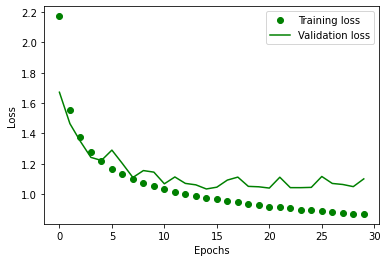

In [26]:
plt.plot(history.history['loss'], 'go', label='Training loss')
plt.plot(history.history['val_loss'], 'g-', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

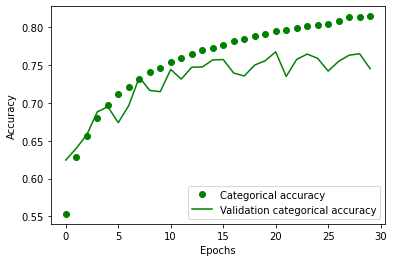

In [27]:
plt.plot(history.history['categorical_accuracy'], 'go', label='Categorical accuracy')
plt.plot(history.history['val_categorical_accuracy'], 'g-', label='Validation categorical accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [28]:
import numpy as np

yhat_test = neural.predict(x_test)
label_test = np.argmax(yhat_test, axis=1)
label_test

313/313 [==============================] - 0s 1ms/step


array([8, 1, 9, ..., 2, 6, 5])

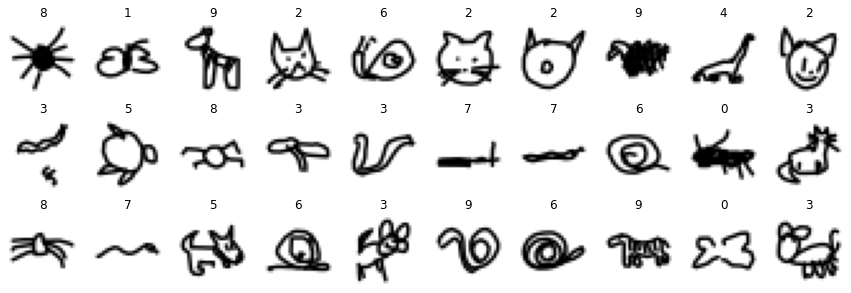

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
for img in range(30):
    plt.subplot(3, 10, img+1)
    plt.imshow(x_test[img].reshape((28, 28)), cmap=plt.cm.binary)
    plt.axis(False)
    plt.title(str(label_test[img]))
plt.show()

In [30]:
from sklearn.metrics import confusion_matrix

conmat = confusion_matrix(np.argmax(y_test, axis=1), label_test)
conmat

array([[674,  16,  28, 139,   8,  30,   4,  18,  36,  29],
       [ 24, 901,  24,  35,   0,  14,  12,   2,   5,   1],
       [ 26,  11, 730, 126,   6,  31,  17,   8,  15,  11],
       [ 72,  21, 112, 691,  16,  59,  21,  15,   9,  18],
       [ 15,   3,   8,  35, 897,   3,   1,  21,   1,   7],
       [ 40,   6,  42, 100,   3, 723,  10,   5,  33,  27],
       [ 34,  21,  57,  59,   4,  38, 716,   6,   6,  10],
       [ 43,   4,  14,  91,  48,  31,  11, 769,   8,   2],
       [113,  20,  45,  50,   4,  87,  11,   4, 621,  12],
       [ 56,   2,  21, 131,  16,  77,  21,   3,   7, 732]])

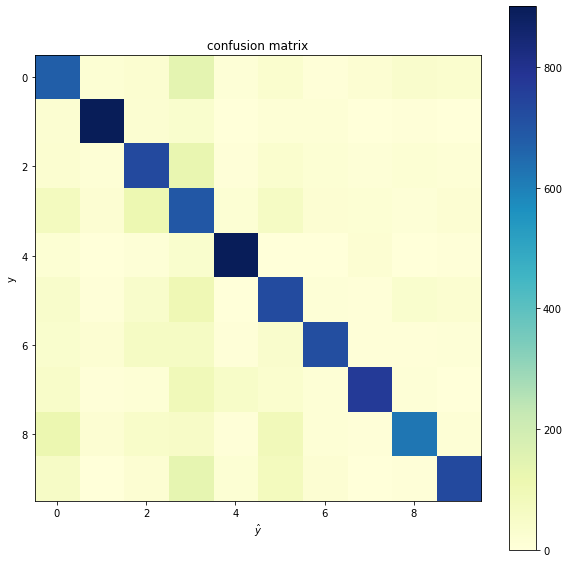

In [22]:
plt.subplots(figsize=(10, 10))
plt.imshow(conmat, cmap=plt.cm.YlGnBu, vmin=0.0)
plt.xlabel('$\hat{y}$')
plt.ylabel('y')
plt.colorbar()
plt.title('confusion matrix')
plt.show()

In [23]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score
print(f'Acc: {accuracy_score(np.argmax(y_test, axis=1), label_test):.3}')
print(f'bAcc: {balanced_accuracy_score(np.argmax(y_test, axis=1), label_test):.3}')

Acc: 0.745
bAcc: 0.745


In [24]:
from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_test, axis=1), label_test, digits=4))

              precision    recall  f1-score   support

           0     0.6144    0.6864    0.6484       982
           1     0.8965    0.8851    0.8908      1018
           2     0.6753    0.7441    0.7081       981
           3     0.4743    0.6683    0.5548      1034
           4     0.8952    0.9051    0.9002       991
           5     0.6615    0.7310    0.6945       989
           6     0.8689    0.7529    0.8068       951
           7     0.9036    0.7532    0.8216      1021
           8     0.8381    0.6422    0.7272       967
           9     0.8622    0.6867    0.7645      1066

    accuracy                         0.7454     10000
   macro avg     0.7690    0.7455    0.7517     10000
weighted avg     0.7689    0.7454    0.7515     10000

